Källor:
- https://youtu.be/w6hQ3ES6Kbg?si=rfy3IYIbRLc3GqaK från Brian
- ChatGPT 4

## DataCleaner 

In [469]:
def dataCleaner(dataPath):
    data = []  

    with open(dataPath, "r") as file:
        next(file) 
        for line in file:
            lineCleaned = line.strip("()\n") 
            lines = lineCleaned.split(",")
            try:
                width = float(lines[0])
                height = float(lines[1])
                data.append((width, height))
            except ValueError:
                print(f"Can't process {line}")
                
    
    
    return data
#Test code
testPath = "../project/data/pichu.txt"
a = dataCleaner(testPath)
a

[(20.11541438766307, 28.701809671168824),
 (15.200086041781336, 27.095070307714877),
 (17.200234546952956, 27.669778220491132),
 (16.785685905190583, 34.36654587712494),
 (20.8917697133121, 31.480353852465935),
 (20.41359589938329, 31.091310056669883),
 (22.137436541638763, 26.71138648198097),
 (15.695510661035328, 32.291267979503495),
 (18.375374557482164, 26.634024937619284),
 (15.238377755504562, 28.794554417576478),
 (16.749103798428827, 34.895233506365955),
 (19.042842304826898, 31.399997598540928),
 (15.212287757470909, 30.569497437746463),
 (16.59070120549319, 31.846142509898748),
 (20.199075502236184, 33.4285192018981),
 (19.35953184482573, 32.75999911546245),
 (16.763524976325574, 27.290480719641042),
 (19.71412547100727, 25.321002439040377),
 (21.475443653422612, 28.154530480590818),
 (15.051990077424488, 27.67740875975703),
 (21.446554014662464, 27.109828435863264),
 (20.585115159905815, 34.429097143350546),
 (17.722004132143937, 33.76367626472669),
 (16.24383599849425, 28.1

## DataLoader för träningsdata

In [470]:
def loadData(path):
    data = []
    with open(path, "r") as file:
        for line in file:
            lines = line.strip("\n").split(",")
            
            try:
                width = float(lines[0])
                height = float(lines[1])
                label = lines[2].strip()
                data.append((width, height, label))
            except ValueError:
                print(f"Could not process {line}")
                
    return data


## DataCombiner
Kombinerar pichu och pikachu data till samma fil

In [471]:
import re

def dataCombiner(pichuPath, pikachuPath):
    data = []  
    def read_data(dataPath, label):
        file = dataCleaner(dataPath)
        for line in file:
            try:
                width, height = line 
                data.append((width, height, label))  
            except ValueError:
                print(f"{line} is incorrecly formatted")
            
    
    read_data(pichuPath, "pichu")
    read_data(pikachuPath, "pikachu")
    return data
    

## Datasaver
Sparar träningsdata till txt fil med label

In [472]:
def trainingDataSaver(data, fileName):
    with open(fileName, "w") as file:
        for line in data:
            file.write(f"{line[0]}, {line[1]}, {line[2]}\n")

## DataLoader för testdata

In [473]:
def loadTestData(path):
    with open(path, "r") as file:
        rawData = file.read()
        data = []
        
        cleanData = rawData.split(",")
        
        
        for line in cleanData:
            lines = line.strip("\n) (").split(".")
            print(lines)
            
            
            try:
                width = float(lines[0])
                height = float(lines[1])
    
                data.append((width, height))
            except ValueError:
                print(f"Could not process {line}")
    
        return data



In [474]:
pichuDataPath = "../project/data/pichu.txt"
pikatchuDataPath = "../project/data/pikachu.txt"
testDataPath = "../project/data/test_points.txt"

combinedData = dataCombiner(pichuDataPath, pikatchuDataPath)

trainingDataSaver(combinedData, "..\project\data\\trainingData.txt")

cleanTestData = loadTestData(testDataPath)



['25', '35']
['15', '14']
['26', '30']
['22', '45']


In [475]:
import math
def euclideanDistance(point1, point2):
    return math.sqrt(sum((p1 - p2) ** 2 for p1, p2 in zip(point1, point2)))

#Test example

point1 = (3, 5)
point2 = (9, 3)

distance = euclideanDistance(point1, point2)
distance

6.324555320336759

In [476]:
def mode(labels):
    
    #Returns the most common label
    
    return max(set(labels), key=labels.count)

## Knn method

In [477]:
def knn(data, query, k):
    distanceIndex = []
    # Calculates distance between query and trained data
    for index, example in enumerate(data):
        distance = euclideanDistance(example[:-1], query)
        distanceIndex.append((distance, index))

    sortedNeighbors = sorted(distanceIndex)

    NearestIndices = [index for _, index in sortedNeighbors[:k]]
    
    nearestLabels = [data[i][-1] for i in NearestIndices]    
    return mode(nearestLabels)


In [478]:
def predict(trainingData, query, k):
    prediction = knn(trainingData, query, k)
    print(f"Prediction: {prediction}")

(20.11541438766307, 28.701809671168824, 'pichu') (15.200086041781336, 27.095070307714877, 'pichu') (17.200234546952956, 27.669778220491132, 'pichu')


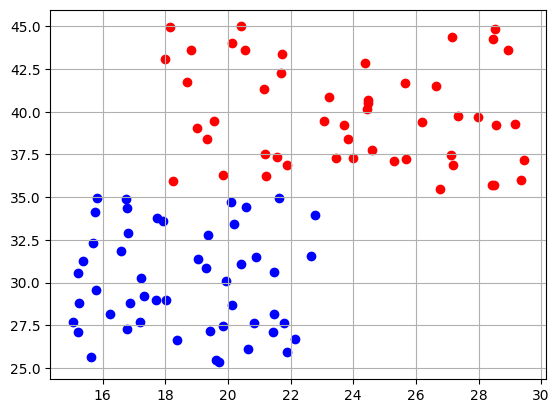

In [479]:
import matplotlib.pyplot as plt


trainingDataPath = "..\project\data\\trainingData.txt"
trainingData = loadData(trainingDataPath)
print(trainingData[0], trainingData[1], trainingData[2])

widths = [point[0] for point in trainingData]
heights = [point[1] for point in trainingData]

pichuP = []
pikachuP = []

for width, height, label in trainingData:
    if label == "pikachu":
        pikachuP.append((width, height))
    elif label == "pichu":
        pichuP.append((width, height))


plt.scatter(*zip(*pichuP), color = "blue", label="Pichu")

plt.scatter(*zip(*pikachuP), color = "red", label="Pikachu")


plt.grid(True)

plt.show()



In [480]:

for line in cleanTestData:
    print(line)
    predict(trainingData, line, 5)


(25.0, 35.0)
Prediction: pikachu
(15.0, 14.0)
Prediction: pichu
(26.0, 30.0)
Prediction: pichu
(22.0, 45.0)
Prediction: pikachu


## User input test

In [481]:
## User console input
input1 = input()
input2 = input()
testInput = (float(input1), float(input2)) 
print(testInput)
predict(trainingData, testInput, 5)

ValueError: could not convert string to float: ''